In [13]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Configurar pandas para ver texto completo
pd.set_option('display.max_colwidth', 150)

# Cargar el dataset limpio que se guardó antes
try:
    df = pd.read_csv('../data/datos_triaje_limpios.csv')
    print(f"✅ Datos cargados correctamente. Total de filas: {len(df)}")
except FileNotFoundError:
    print("❌ Error: No se encuentra el archivo. Verifica que se ejecuto el Notebook 1.")

# Cargar el modelo de lenguaje en español de Spacy
try:
    nlp = spacy.load("es_core_news_sm")
    print("✅ Modelo de lenguaje español (SpaCy) cargado.")
except OSError:
    print("❌ Error: Modelo de SpaCy no encontrado. Ejecuta en tu terminal: python -m spacy download es_core_news_sm")

✅ Datos cargados correctamente. Total de filas: 4417
✅ Modelo de lenguaje español (SpaCy) cargado.


In [14]:
# Definir las palabras que se quiere eliminar (stopwords)
stopwords = nlp.Defaults.stop_words

def procesar_texto_medico(texto):
    # 1. Convertir a objeto SpaCy (Tokenización automática)
    doc = nlp(texto)
    
    tokens_limpios = []
    
    for token in doc:
        # Filtros:
        # - Que no sea signo de puntuación (is_punct)
        # - Que no sea una 'stopword' (is_stop)
        # - Que sea letras y no números sueltos (is_alpha)
        if not token.is_punct and not token.is_stop and token.is_alpha:
            # 2. Lematización: Tomar la raíz de la palabra (lemma_) y se pasa a minúsculas
            tokens_limpios.append(token.lemma_.lower())
            
    # Unir las palabras limpias de nuevo en una frase
    return " ".join(tokens_limpios)

# Probemos la función con un ejemplo
ejemplo = "El paciente presenta dolores fuertes en el abdomen y vómitos constantes."
print(f"Original: {ejemplo}")
print(f"Procesado: {procesar_texto_medico(ejemplo)}")

Original: El paciente presenta dolores fuertes en el abdomen y vómitos constantes.
Procesado: paciente presentar dolor fuerte abdomen vómito constante


In [15]:
print("⏳ Procesando todo el dataset (esto puede tardar unos segundos)...")

# Aplicar la función a la columna 'sintomas'
df['sintomas_procesados'] = df['sintomas'].apply(procesar_texto_medico)

print("✅ ¡Procesamiento terminado!")

# Comparar el Antes y el Después
display(df[['sintomas', 'sintomas_procesados']].head(5))

⏳ Procesando todo el dataset (esto puede tardar unos segundos)...


✅ ¡Procesamiento terminado!


,sintomas,sintomas_procesados
0,QUEJA PRINCIPAL: Cáncer de vejiga. ANTECEDENTES DE LA ENFERMEDAD ACTUAL: El paciente es un hombre caucásico de 68 años con antecedentes de hematur...,queja principal cáncer vejiga antecedente enfermedad actual paciente hombre caucásico año antecedente hematuria macroscópico paciente acudir sala ...
1,"QUEJA PRINCIPAL: ""Me han arrojado muchas cosas"". El paciente es entrevistado con su esposo en la habitación. ANTECEDENTES DE LA ENFERMEDAD ACTUAL:...",queja principal arrojar cosa paciente entrevistar esposo habitación antecedente enfermedad actual mujer caucásico año antecedente enfermedad hunti...
2,TÍTULO DE LA OPERACIÓN: Reoperación central del cuello con extirpación de linfadenopatía metastásica residual y tejido tiroideo en la zona central...,título operación reoperación central cuello extirpación linfadenopatir metastásico residual tejido tiroideo zona central cuello disección reoperat...
3,"Varón de 43 años que ingresa en el hospital por dolor precordial intenso de una hora de duración. El ECG mostró ligera E-ST inferior, onda J promi...",varón año ingresar hospital dolor precordial intenso hora duración ecg mostrar ligero inferior onda j prominente marcado derivación diagnosticado ...
4,"DIAGNÓSTICO PREOPERATORIO: , Masa suprarrenal izquierda, 5,5 cm., DIAGNÓSTICO POSTOPERATORIO:,1. Masa suprarrenal izquierda de 5,5 cm.,2. Adhere...",diagnóstico preoperatorio masa suprarrenal izquierdo cm diagnóstico masa suprarrenal izquierdo cm adherencias intraabdominal lisis laparoscópico a...


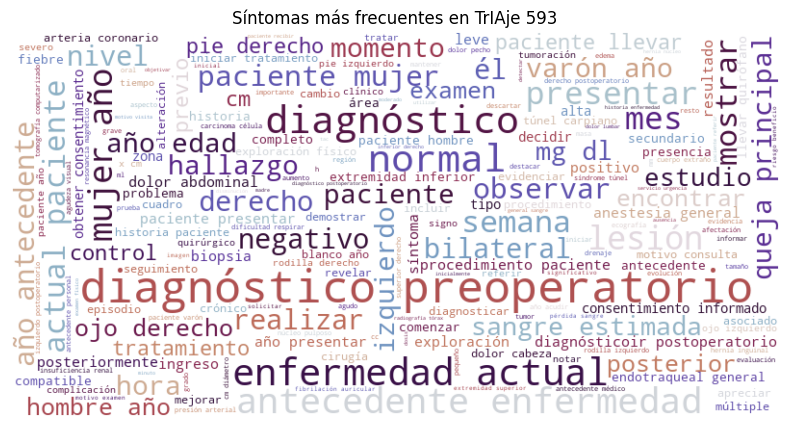

In [16]:
from wordcloud import WordCloud

# Unir todo el texto procesado en un solo bloque gigante
texto_completo = " ".join(df['sintomas_procesados'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='twilight').generate(texto_completo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Síntomas más frecuentes en TrIAje 593')
plt.show()

In [17]:
# Guardar solo las columnas que se necesitan para entrenar
df_final = df[['sintomas_procesados', 'especialidad']]

# Eliminar filas que hayan quedado vacías después de la limpieza
df_final = df_final[df_final['sintomas_procesados'].str.strip() != '']

df_final.to_csv('../data/datos_nlp_procesados.csv', index=False)
print("✅ Archivo 'datos_nlp_procesados.csv' guardado en /data ready para Machine Learning.")

✅ Archivo 'datos_nlp_procesados.csv' guardado en /data ready para Machine Learning.
